#### ==== **Head Detection for Cropping** ====

Check Numpy Version for compatibility

In [1]:
import numpy as np
print(np.__version__)


1.26.4


In [2]:
np.bool = np.bool_  # Fix for older code using np.bool
np.int = np.int_    # Fix for older code using np.int
np.float = np.float_  # Fix for older code using np.float
np.complex = np.complex_  # Fix for older code using np.complex
np.object = np.object_  # Fix for older code using np.object
np.unicode = np.unicode_  # Fix for older code using np.unicode
np.str = np.str_  # Fix for older code using np.str

Checking Torch Version

In [3]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.0.1+cpu
False


In [4]:
from head_detector import HeadDetector
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#initialize head detector
detector = HeadDetector()

cpu


if there is an error on :

Could not run ‘aten::q_scale’ with arguments from the ‘CUDA’ backend

try typing "print(self._device)" onto the detector package

In [6]:
#specify image path
image_directory = os.path.join("dataset", "abedi pele torino 1994")
image_num = 3

In [7]:
image_loc = os.path.join(image_directory, f"Image_{image_num}.jpg")
print(f"image chosen location = {image_loc}")

image chosen location = dataset/abedi pele torino 1994/Image_3.jpg


In [8]:
predictions = detector(image_loc)

GET RESULT :

"landmarks": [draw_3d_landmarks],

"points": [draw_2d_landmarks],

"pose": [draw_pose],

'full': [draw_bboxes, draw_3d_landmarks],

'bbox': [draw_bboxes],

In [9]:
result_image = predictions.draw('bbox')

In [10]:
cv2.imwrite("result.png", result_image)

True

==== **Modify get_aligned_head method** ====

Customize the size of width and height after the line

x, y, w, h = head_bbox

I changed the 

w to w = int(w * 1.2)

h to h = int(h * 1.5)



In [9]:
#get only the aligned head
aligned_heads = predictions.get_aligned_heads()

In [10]:
# Process or save aligned head crops
for i, head in enumerate(aligned_heads):
    cropped_head = cv2.cvtColor(head, cv2.COLOR_RGB2BGR)
    cv2.imwrite(f"aligned_head_{i}.png", cropped_head)

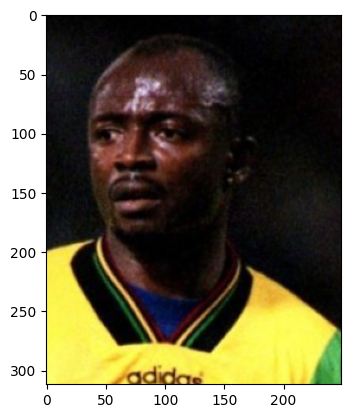

In [11]:
plt.imshow(head)